In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\BE\dmv\datasets\RealEstate_price.csv")

In [3]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Sales_date
0,1,114300.0,1790,2.0,2,2,No,East,15-01-2021
1,2,114200.0,2030,4.0,2,3,No,East,21-09-2022
2,3,114800.0,1740,3.0,2,1,No,East,13-03-2022
3,4,94700.0,1980,3.0,2,3,No,East,31-08-2021
4,5,119800.0,2130,3.0,3,3,No,East,31-08-2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Home          128 non-null    int64  
 1   Price         124 non-null    float64
 2   SqFt          128 non-null    int64  
 3   Bedrooms      124 non-null    float64
 4   Bathrooms     128 non-null    int64  
 5   Offers        128 non-null    int64  
 6   Brick         128 non-null    object 
 7   Neighborhood  128 non-null    object 
 8   Sales_date    128 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 9.1+ KB


In [5]:
print(df.isnull().sum())

Home            0
Price           4
SqFt            0
Bedrooms        4
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
Sales_date      0
dtype: int64


In [6]:
#filling wiht median
df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)

In [8]:
#filtering the datasets
df['Sales_date'] = pd.to_datetime(df['Sales_date'], format='%d-%m-%Y')

#now that data filetered we can filter out properties sold in 2021
df_2021 = df[df['Sales_date'].dt.year == 2021]

In [10]:
print(df_2021)

     Home     Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood  \
0       1  114300.0  1790       2.0          2       2    No         East   
3       4   94700.0  1980       3.0          2       3    No         East   
4       5  119800.0  2130       3.0          3       3    No         East   
5       6  114600.0  1780       3.0          2       2    No        North   
10     11  132500.0  2030       3.0          2       3   Yes         East   
11     12  123000.0  1870       2.0          2       2   Yes         East   
14     15  176800.0  2590       4.0          3       4    No         West   
16     17  147100.0  2190       3.0          3       4   Yes         East   
18     19  111400.0  1700       2.0          2       1   Yes         East   
20     21  116200.0  1790       3.0          2       3    No         East   
23     24  106100.0  1820       3.0          2       3   Yes        North   
30     31  182000.0  2250       4.0          3       3   Yes         West   

In [15]:
#Encoding categorical data 
## conver 'brick' to binary (1: Yes, 0: No)
df['Brick'] = df['Brick'].map({'Yes': 1, 'No': 0})



0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Brick, dtype: float64


In [18]:
#aggregating data
##aggregating avg sale price by neighborhood

average_price_by_neighborhood = df.groupby('Neighborhood')['Price'].mean().reset_index()
print(average_price_by_neighborhood)

  Neighborhood          Price
0         East  124620.930233
1        North  110426.190476
2         West  159294.871795


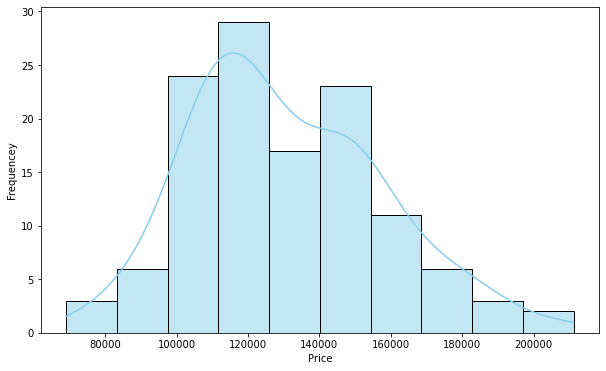

In [16]:
#viz

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequencey')
plt.show()

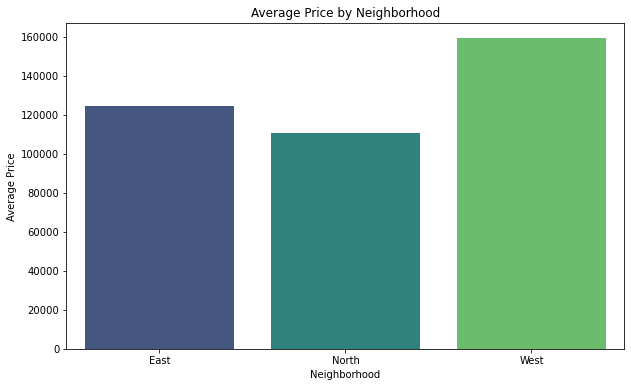

In [20]:
#bar plot for average price by neighborhood
plt.figure(figsize=(10, 6))
sns.barplot(x='Neighborhood', y='Price', data=average_price_by_neighborhood, palette ='viridis')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()

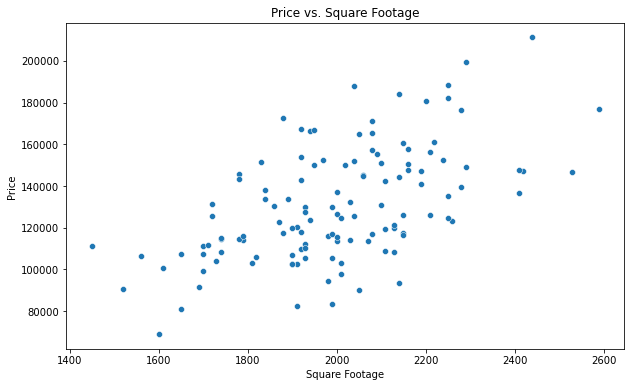

In [24]:
#scatter plot for price vs sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SqFt', y='Price', data =df, palette='coolwarm')
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()